#Mountain Car MDP
This notebook shows how to generate the state-action value function for the classic mountain car problem. The correctness of the solution is verified by trajectory simulations.

###Problem definition
The car starts from the position-velocity pair $\left(x, \dot{x}\right)$ and follows the dynamics

\begin{align*}
    \dot{x} &:= \dot{x} + 0.001 a - 0.0025 \cos\left(3 x \right) \\
    x &:= x + \dot{x},
\end{align*}

where $a \in \left[ -1, 1 \right]$ is the acceleration input. The car can take on the state values $\left(x, \dot{x}\right) \in \left[ -0.07, 0.07 \right] \times \left[ -1.2, 0.6 \right]$. To incentivize getting to the top of the mountain at $x_{0} = 0.5$, the reward function is defined

\begin{align*}
    R\left(x\right) = 
    \left\{
    \begin{array}{ll}
        10, & x \geq x_{0} \\
        -1, & \mbox{ otherwise}.
    \end{array}
    \right.
\end{align*}

###Value iteration
To solve an MDP, we compute a policy $\pi^{\star}$ that, if followed, maximizes the expected sum of immediate rewards from any given state. The optimal policy is related to the optimal state-action value function $Q^{\star}\left(s, a\right)$, which is the expected value when starting in state $s$, taking action $a$, and then following actions dictated by $\pi^{\star}$. Mathematically, it obeys the Bellman recursion

\begin{align*}
    Q^{\star}\left(s, a\right) = R\left(s, a\right) + \sum_{s' \in \mathcal{S}} T\left(s, a, s'\right) \max_{a' \in \mathcal{A}} Q^{\star}\left(s', a'\right).
\end{align*}

The state-action value function can be computed using a dynamic programming algorithm called value iteration. To obtain the optimal policy for state $s$, we compute

\begin{align*}
    \pi^{\star} \left(s\right) = \mbox{argmax}_{a \in \mathcal{A}} Q^{\star}\left(s, a\right).
\end{align*}

###Generate state-action value function

In [1]:
using MDPs, MountainCar
mdp = MDP(state_space(20, 20), action_space(200), transition, reward)
policy = value_iteration(mdp, false, "../data/qmc_small.csv", false)
print("")  # suppress output

Starting value iteration...
Value iteration took 291 iterations and 3.58e+01 sec


###Visualize policy as a heat map

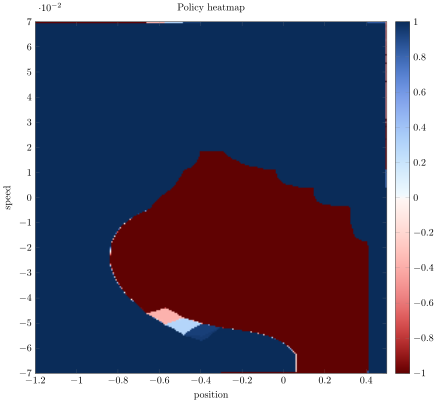

In [2]:
viz_policy(mdp, policy)

###Verify correctness
Simulate and visualize trajectory from initial state `[position, speed]`.

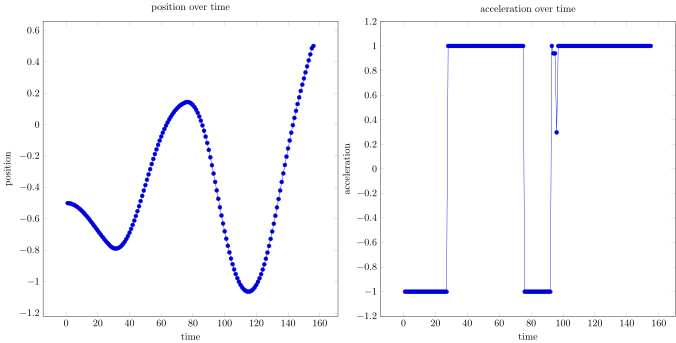

In [3]:
ss, as = simulate(mdp, policy, [-0.5, 0.0])
viz_trajectory(ss, as)